<a href="https://colab.research.google.com/github/TsarIM/Optimizing-Vehicle-Routing-using-Genetic-Algorithm/blob/main/GeneticAlgorithm_VRPoptimisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from deap import base,creator,tools,algorithms

In [ ]:
toolbox=base.Toolbox()

In [ ]:
# both weights negative to minimise both total distance and imbalance
creator.create('FitnessMin',base.Fitness,weights=(-1,-1))
# individual named Route
creator.create('Route',list,fitness=creator.FitnessMin)

In [ ]:
n_locs=30 #number of locations except depot
n_trucks=4 #number of transport vehicles
locs=[]
depot=(47,55)
for _ in range(n_locs):
  locs.append((random.randint(0,100),random.randint(0,100)))
#locs now contains {n_locs} coordinates of locations to be visited

In [ ]:
toolbox.register("ordering", random.sample, range(n_locs),n_locs) #function to generate orderings of numbers from 0-(n_locs-1) (non repeating elements)
toolbox.register("route", tools.initIterate, creator.Route, toolbox.ordering)  #function to create an individual-route by shuffling location indeces list
toolbox.register("population", tools.initRepeat, list, toolbox.route) #function to create a population of routes

In [ ]:
def evaluate(route):#function to evaluate the fitness of a route

  total_distance=0
  truck_distances=[]

  for i in range(n_trucks):
    truck_route = [depot]+[locs[route[j]] for j in range(i,len(route),n_trucks)]+[depot]
    truck_dist=sum(np.linalg.norm(np.array(truck_route[k+1]) - np.array(truck_route[k])) for k in range(len(truck_route)-1))
    total_distance+=truck_dist
    truck_distances.append(truck_dist)

  imbalance=np.std(truck_distances)
  return total_distance,imbalance

In [ ]:
toolbox.register('evaluate',evaluate)
toolbox.register('mate',tools.cxPartialyMatched)
toolbox.register('mutate',tools.mutShuffleIndexes,indpb=0.1)
toolbox.register('select',tools.selTournament,tournsize=3)

In [ ]:
def plot_routes(route):
  plt.figure(figsize=(8, 6), dpi=100)
  plt.plot(depot[0],depot[1],'gs')
  plt.text(depot[0],depot[1],str(0),fontsize=12,ha='left')

  for l_i,(x,y) in enumerate(locs):
    plt.plot(x,y,'ro')
    plt.text(x,y,str(l_i+1),fontsize=12,ha='left')

  for i in range(n_trucks):
    truck_route=[depot]+[locs[route[j]]for j in range(i, len(route),n_trucks)]+[depot]
    plt.plot(*zip(*truck_route),'-')

  plt.title('Optimised Routes')
  plt.xlabel('x-coordinates')
  plt.ylabel('y-coordinates')
  plt.show()


In [ ]:
def run_ga(generations,pop_size,cxpb,mutpb,bool_value):
  random.seed(96)#for reproducibility
  pop=toolbox.population(n=pop_size)
  optimal=tools.HallOfFame(1)#to get the best individual

  algorithms.eaSimple(pop,toolbox,cxpb,mutpb,generations,halloffame=optimal,verbose=bool_value)

  plot_routes(optimal[0])

  optimal_paths=[[] for _ in range(n_trucks)]#stores path for each truck in different rows

  for i in range(n_locs):
    optimal_paths[i%n_trucks].append(optimal[0][i]+1)

  return optimal_paths


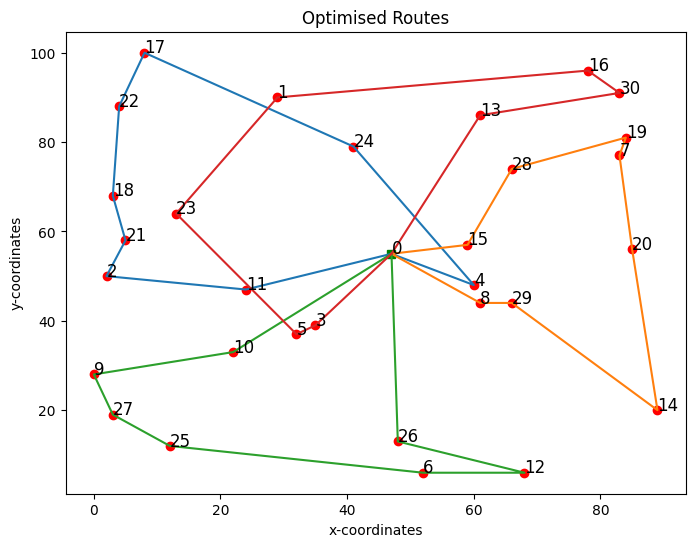

[[4, 24, 17, 22, 18, 21, 2, 11],
 [15, 28, 19, 7, 20, 14, 29, 8],
 [26, 12, 6, 25, 27, 9, 10],
 [3, 5, 23, 1, 16, 30, 13]]

In [ ]:
run_ga(200,300,0.7,0.2,0)#0.7 crossover prob.,0.2 mutation prob.